In [1]:
!pip install nltk gensim scikit-learn pandas numpy matplotlib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


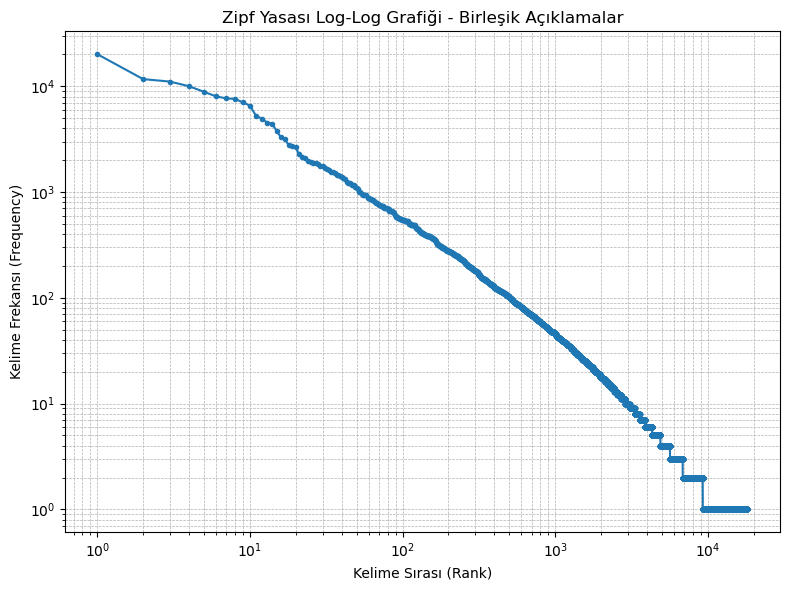

Toplam belge sayısı: 5000
Eşsiz kelime sayısı: 18178
Toplam kelime sayısı: 414904
Veri seti Zipf analizi için yeterlidir.


In [5]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Birleştirilmiş dosyayı yükle
df = pd.read_csv("veri_5k.csv")

# Metinleri birleştir ve temizle
all_text = " ".join(df["review"].astype(str).tolist()).lower()
tokens = word_tokenize(all_text)
tokens = [token for token in tokens if token.isalpha()]  # sadece harflerden oluşan kelimeler

# Frekansları say
word_freq = Counter(tokens)
sorted_freq = sorted(word_freq.values(), reverse=True)

# Log-log grafiği (Zipf)
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Birleşik Açıklamalar")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Kelime Frekansı (Frequency)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Veri boyutu bilgisi
print(f"Toplam belge sayısı: {len(df)}")
print(f"Eşsiz kelime sayısı: {len(word_freq)}")
print(f"Toplam kelime sayısı: {len(tokens)}")

if len(tokens) < 1000:
    print("Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("Veri seti Zipf analizi için yeterlidir.")

In [7]:
df_birlesik = df.dropna()
df_birlesik = df.reset_index(drop=True)

# İlk 5 veri örneği
df_birlesik.head()

,review,game_name
0,2023 So Elden Ring is my first souls-like game...,ELDEN RING
1,"Blood, Guts, Friends what more can a Guy ask f...","Warhammer 40,000: Space Marine 2"
2,2014 One of the best game which i have ever pl...,Counter-Strike 2
3,FOR THE EMPEROR,"Warhammer 40,000: Space Marine 2"
4,2022 Hochland trait. Knowledgeable trait. 1000...,Total War: WARHAMMER III


In [9]:
# Lowercasing ve HTML/Özel Karakter Temizliği
import re
from bs4 import BeautifulSoup

def clean_text(text):
    # HTML etiketlerini kaldır (gerekirse)
    text = BeautifulSoup(text, "html.parser").get_text()
    # Özel karakterleri kaldır
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Küçük harfe çevir
    return text.lower()

df_birlesik["cleaned"] = df_birlesik["review"].apply(clean_text)

# Örnek dönüşüm
print("Örnek orijinal metin:\n", df_birlesik["review"].iloc[0])
print("\nTemizlenmiş:\n", df_birlesik["cleaned"].iloc[0])

Örnek orijinal metin:
 2023 So Elden Ring is my first souls-like game that i have ever gotten 100% achievements...AND IT WAS AMAZING!!! this is the best game i have ever played and i loved every minute of playing it! the story the world the characters I LOVED ALL OF IT! i felt like a kid in a candyshop except the storeowner and everyone in the shop is trying to kill me as i keep dodging them trying to steal candy for myself giggling wildly to myself as i have gone mad from being touched by a giant burned and smoldering hand that only has three fingers, but hey at least i get some awesome looking eyes! so yeah i can't wait for the dlc to come out! this game get's a golden 10/10 from me!

Temizlenmiş:
 2023 so elden ring is my first soulslike game that i have ever gotten 100 achievementsand it was amazing this is the best game i have ever played and i loved every minute of playing it the story the world the characters i loved all of it i felt like a kid in a candyshop except the storeown

C:\Users\eren\AppData\Local\Temp\ipykernel_16152\3456799796.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [11]:
# Tokenization ve Noktalama İşareti Kaldırma
from nltk.tokenize import word_tokenize
import string

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # sadece alfabetik kelimeler
    return tokens

df_birlesik["tokens"] = df_birlesik["cleaned"].apply(tokenize)

# Örnek
print("Tokenized örnek:", df_birlesik["tokens"].iloc[0])

Tokenized örnek: ['so', 'elden', 'ring', 'is', 'my', 'first', 'soulslike', 'game', 'that', 'i', 'have', 'ever', 'gotten', 'achievementsand', 'it', 'was', 'amazing', 'this', 'is', 'the', 'best', 'game', 'i', 'have', 'ever', 'played', 'and', 'i', 'loved', 'every', 'minute', 'of', 'playing', 'it', 'the', 'story', 'the', 'world', 'the', 'characters', 'i', 'loved', 'all', 'of', 'it', 'i', 'felt', 'like', 'a', 'kid', 'in', 'a', 'candyshop', 'except', 'the', 'storeowner', 'and', 'everyone', 'in', 'the', 'shop', 'is', 'trying', 'to', 'kill', 'me', 'as', 'i', 'keep', 'dodging', 'them', 'trying', 'to', 'steal', 'candy', 'for', 'myself', 'giggling', 'wildly', 'to', 'myself', 'as', 'i', 'have', 'gone', 'mad', 'from', 'being', 'touched', 'by', 'a', 'giant', 'burned', 'and', 'smoldering', 'hand', 'that', 'only', 'has', 'three', 'fingers', 'but', 'hey', 'at', 'least', 'i', 'get', 'some', 'awesome', 'looking', 'eyes', 'so', 'yeah', 'i', 'cant', 'wait', 'for', 'the', 'dlc', 'to', 'come', 'out', 'this',

In [13]:
# Stop Word Removal
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [t for t in tokens if t not in stop_words]

df_birlesik["no_stopwords"] = df_birlesik["tokens"].apply(remove_stopwords)

# Örnek
print("Stopword çıkarı:", df_birlesik["no_stopwords"].iloc[0])

Stopword çıkarı: ['elden', 'ring', 'first', 'soulslike', 'game', 'ever', 'gotten', 'achievementsand', 'amazing', 'best', 'game', 'ever', 'played', 'loved', 'every', 'minute', 'playing', 'story', 'world', 'characters', 'loved', 'felt', 'like', 'kid', 'candyshop', 'except', 'storeowner', 'everyone', 'shop', 'trying', 'kill', 'keep', 'dodging', 'trying', 'steal', 'candy', 'giggling', 'wildly', 'gone', 'mad', 'touched', 'giant', 'burned', 'smoldering', 'hand', 'three', 'fingers', 'hey', 'least', 'get', 'awesome', 'looking', 'eyes', 'yeah', 'cant', 'wait', 'dlc', 'come', 'game', 'gets', 'golden']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df_birlesik["lemmatized"] = df_birlesik["no_stopwords"].apply(lemmatize)

# Örnek
print("Lemmatized:", df_birlesik["lemmatized"].iloc[0])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized: ['elden', 'ring', 'first', 'soulslike', 'game', 'ever', 'gotten', 'achievementsand', 'amazing', 'best', 'game', 'ever', 'played', 'loved', 'every', 'minute', 'playing', 'story', 'world', 'character', 'loved', 'felt', 'like', 'kid', 'candyshop', 'except', 'storeowner', 'everyone', 'shop', 'trying', 'kill', 'keep', 'dodging', 'trying', 'steal', 'candy', 'giggling', 'wildly', 'gone', 'mad', 'touched', 'giant', 'burned', 'smoldering', 'hand', 'three', 'finger', 'hey', 'least', 'get', 'awesome', 'looking', 'eye', 'yeah', 'cant', 'wait', 'dlc', 'come', 'game', 'get', 'golden']


In [17]:
# Sitemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem(tokens):
    return [stemmer.stem(t) for t in tokens]

df_birlesik["stemmed"] = df_birlesik["no_stopwords"].apply(stem)

# Örnek
print("Stemmed:", df_birlesik["stemmed"].iloc[0])

Stemmed: ['elden', 'ring', 'first', 'soulslik', 'game', 'ever', 'gotten', 'achievementsand', 'amaz', 'best', 'game', 'ever', 'play', 'love', 'everi', 'minut', 'play', 'stori', 'world', 'charact', 'love', 'felt', 'like', 'kid', 'candyshop', 'except', 'storeown', 'everyon', 'shop', 'tri', 'kill', 'keep', 'dodg', 'tri', 'steal', 'candi', 'giggl', 'wildli', 'gone', 'mad', 'touch', 'giant', 'burn', 'smolder', 'hand', 'three', 'finger', 'hey', 'least', 'get', 'awesom', 'look', 'eye', 'yeah', 'cant', 'wait', 'dlc', 'come', 'game', 'get', 'golden']


In [21]:
# Önişlenmiş verileri Tekrar string'e çevirerek kaydet
df_birlesik["lemmatized_text"] = df_birlesik["lemmatized"].apply(lambda x: " ".join(x))
df_birlesik["stemmed_text"] = df_birlesik["stemmed"].apply(lambda x: " ".join(x))

df_birlesik[["review", "lemmatized_text"]].to_csv("lemmatized.csv", index=False)
df_birlesik[["review", "stemmed_text"]].to_csv("stemmed.csv", index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


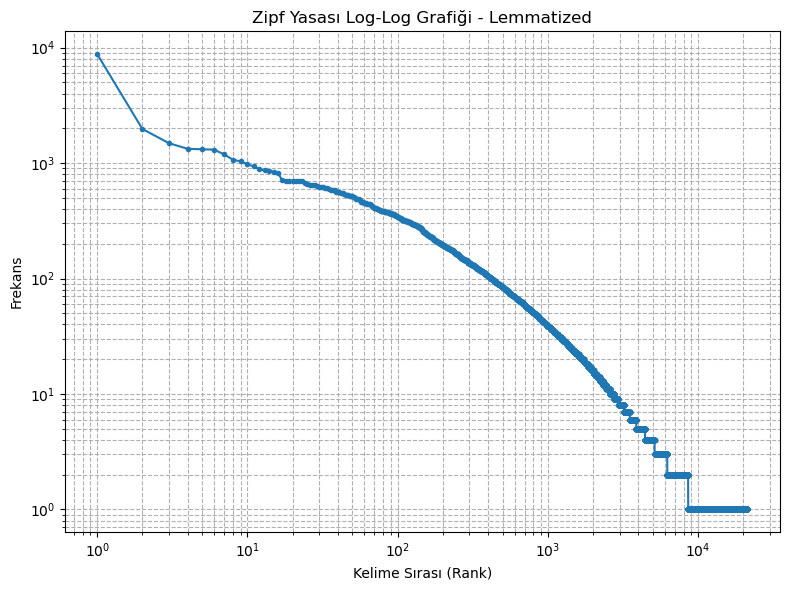

Toplam metin sayısı: 5000
Toplam kelime sayısı: 226924
Eşsiz kelime sayısı: 21316
Veri seti Zipf analizi için yeterlidir.


In [23]:
# lemmatized.csv Zipf Grafiği ve Değerlendirme
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Veri yükle
lem_df = pd.read_csv("lemmatized.csv")

# Tüm metinleri birleştir ve tokenize et
all_text = " ".join(lem_df["lemmatized_text"].astype(str).tolist())
tokens = word_tokenize(all_text)
tokens = [t for t in tokens if t.isalpha()]

# Frekans sayımı
freq = Counter(tokens)
sorted_freq = sorted(freq.values(), reverse=True)

# Zipf log-log grafiği
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Lemmatized")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Frekans")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()

print(f"Toplam metin sayısı: {len(lem_df)}")
print(f"Toplam kelime sayısı: {len(tokens)}")
print(f"Eşsiz kelime sayısı: {len(freq)}")

if len(tokens) < 1000:
    print("Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("Veri seti Zipf analizi için yeterlidir.")

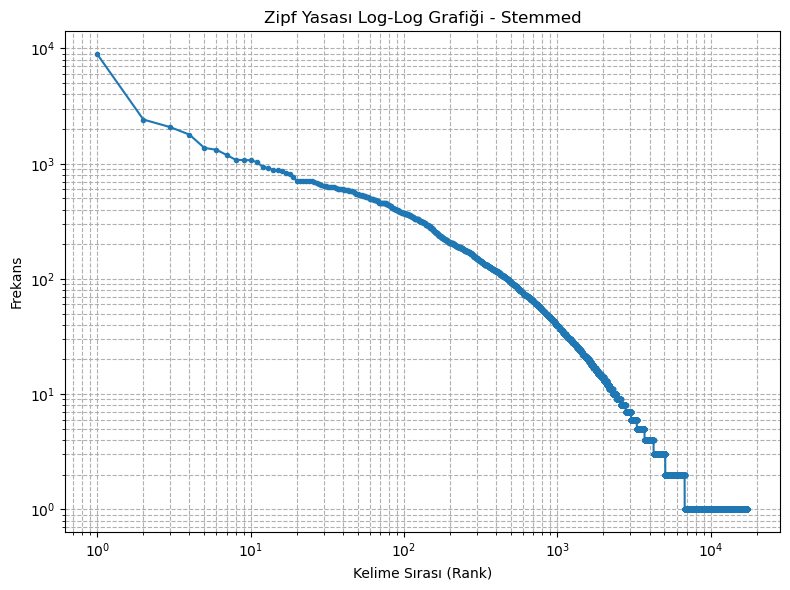

Toplam metin sayısı: 5000
Toplam kelime sayısı: 226924
Eşsiz kelime sayısı: 17405
Veri seti Zipf analizi için yeterlidir.


In [25]:
# stemmed.csv Zipf Grafiği ve Değerlendirme
# Veri yükle
stem_df = pd.read_csv("stemmed.csv")

# Tüm metinleri birleştir ve tokenize et
all_text = " ".join(stem_df["stemmed_text"].astype(str).tolist())
tokens = word_tokenize(all_text)
tokens = [t for t in tokens if t.isalpha()]

# Frekans sayımı
freq = Counter(tokens)
sorted_freq = sorted(freq.values(), reverse=True)

# Zipf log-log grafiği
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Stemmed")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Frekans")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()

print(f"Toplam metin sayısı: {len(stem_df)}")
print(f"Toplam kelime sayısı: {len(tokens)}")
print(f"Eşsiz kelime sayısı: {len(freq)}")

if len(tokens) < 1000:
    print("Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("Veri seti Zipf analizi için yeterlidir.")

In [27]:
# Lemmatized TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Lemmatized veri yükle
lem_df = pd.read_csv("lemmatized.csv")

# Boş (NaN) satırları temizle
lem_df["lemmatized_text"] = lem_df["lemmatized_text"].fillna("")

# TF-IDF hesapla
vectorizer_lem = TfidfVectorizer()
X_lem = vectorizer_lem.fit_transform(lem_df["lemmatized_text"])

# Kaydet
tfidf_lem_df = pd.DataFrame(X_lem.toarray(), columns=vectorizer_lem.get_feature_names_out())
tfidf_lem_df.to_csv("tfidf_lemmatized.csv", index=False)

In [28]:
# Stemmed TF-IDF
# Stemmed veri yükle
stem_df = pd.read_csv("stemmed.csv")

# Boş (NaN) satırları temizle
stem_df["stemmed_text"] = stem_df["stemmed_text"].fillna("")

# TF-IDF hesapla
vectorizer_stem = TfidfVectorizer()
X_stem = vectorizer_stem.fit_transform(stem_df["stemmed_text"])

# Kaydet
tfidf_stem_df = pd.DataFrame(X_stem.toarray(), columns=vectorizer_stem.get_feature_names_out())
tfidf_stem_df.to_csv("tfidf_stemmed.csv", index=False)

In [31]:
# Word2Vec Parametre Setleri ve Eğitim Döngüsü
from gensim.models import Word2Vec
import pandas as pd
import os

# Klasör oluşturulmamışsa oluştur
os.makedirs("models", exist_ok=True)

# 🧪 Parametre kombinasyonları (8 adet)
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300},
]

# Her veri tipi için ayrı ayrı (lemmatized, stemmed)
for mode in ["lemmatized", "stemmed"]:
    path = f"{mode}.csv"
    df = pd.read_csv(path)
    
    text_col = f"{mode}_text"
    df[text_col] = df[text_col].fillna("")
    sentences = df[text_col].apply(lambda x: x.split()).tolist()

    for params in parameters:
        model_type = params["model_type"]
        sg = 1 if model_type == "skipgram" else 0
        window = params["window"]
        vector_size = params["vector_size"]

        # Model ismi örneği: word2vec_lemmatized_cbow_win2_dim100.model
        model_name = f"word2vec_{mode}_{model_type}_win{window}_dim{vector_size}"
        model_path = f"./models/{model_name}.model"

        print(f"\n Model eğitiliyor: {model_name}")

        #  Eğitim
        model = Word2Vec(
            sentences=sentences,
            vector_size=vector_size,
            window=window,
            sg=sg,
            min_count=1
        )

        # Kaydet
        model.save(model_path)
        print(f" Kaydedildi: {model_path}")

        # Örnek kelime benzerliği
        try:
            print(f"'game' kelimesine en benzer 5 kelime:")
            for word, score in model.wv.most_similar("game", topn=5):
                print(f" - {word}: {score:.4f}")
        except KeyError:
            print("'game' kelimesi modelde bulunamadı.")


 Model eğitiliyor: word2vec_lemmatized_cbow_win2_dim100
 Kaydedildi: ./models/word2vec_lemmatized_cbow_win2_dim100.model
'game' kelimesine en benzer 5 kelime:
 - love: 0.9667
 - playing: 0.9656
 - series: 0.9648
 - first: 0.9642
 - made: 0.9641

 Model eğitiliyor: word2vec_lemmatized_skipgram_win2_dim100
 Kaydedildi: ./models/word2vec_lemmatized_skipgram_win2_dim100.model
'game' kelimesine en benzer 5 kelime:
 - definitely: 0.8944
 - absolutely: 0.8823
 - experience: 0.8803
 - put: 0.8732
 - finally: 0.8729

 Model eğitiliyor: word2vec_lemmatized_cbow_win4_dim100
 Kaydedildi: ./models/word2vec_lemmatized_cbow_win4_dim100.model
'game' kelimesine en benzer 5 kelime:
 - playing: 0.9848
 - love: 0.9826
 - first: 0.9818
 - probably: 0.9815
 - year: 0.9773

 Model eğitiliyor: word2vec_lemmatized_skipgram_win4_dim100
 Kaydedildi: ./models/word2vec_lemmatized_skipgram_win4_dim100.model
'game' kelimesine en benzer 5 kelime:
 - definitely: 0.8854
 - doubt: 0.8650
 - yet: 0.8606
 - potential: 0.

In [38]:
df = pd.read_csv("veri_5k.csv").dropna().reset_index(drop=True)

# İlk 10 açıklamayı gösterelim
for i in range(5):
    print(f"Satır {i}:\n{df['review'].iloc[i]}\n")

Satır 0:
2023 So Elden Ring is my first souls-like game that i have ever gotten 100% achievements...AND IT WAS AMAZING!!! this is the best game i have ever played and i loved every minute of playing it! the story the world the characters I LOVED ALL OF IT! i felt like a kid in a candyshop except the storeowner and everyone in the shop is trying to kill me as i keep dodging them trying to steal candy for myself giggling wildly to myself as i have gone mad from being touched by a giant burned and smoldering hand that only has three fingers, but hey at least i get some awesome looking eyes! so yeah i can't wait for the dlc to come out! this game get's a golden 10/10 from me!

Satır 1:
Blood, Guts, Friends what more can a Guy ask for Really.

Satır 2:
2014 One of the best game which i have ever played :'D

Satır 3:
FOR THE EMPEROR

Satır 4:
2022 Hochland trait. Knowledgeable trait. 1000 other mechanics that used to be good but are now completely worthless. Did you know that this is a singl

In [42]:
metin_sec = 0
input_index = df["review"].iloc[metin_sec]
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_lemma(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

giris_metni = preprocess_lemma(input_index)
print("Seçilen giriş metni:")
print(giris_metni)

Seçilen giriş metni:
elden ring first game ever gotten achievement amazing best game ever played loved every minute playing story world character loved felt like kid candyshop except storeowner everyone shop trying kill keep dodging trying steal candy giggling wildly gone mad touched giant burned smoldering hand three finger hey least get awesome looking eye yeah ca wait dlc come game get golden


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# 1. Veri setini yükle
df = pd.read_csv("lemmatized.csv")
df["lemmatized_text"] = df["lemmatized_text"].fillna("")

# 2. TF-IDF modeli
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["lemmatized_text"])

# 3. Giriş metni: seçilen metin

input_vec = tfidf_matrix[metin_sec]
input_text = df["lemmatized_text"].iloc[metin_sec]

# 4. Cosine similarity tüm veri ile
cosine_sim = cosine_similarity(input_vec, tfidf_matrix)[0]

# 5. En benzer 5 metni bul (kendisi dahil olur)
top5_idx = cosine_sim.argsort()[-5:][::-1]

# 6. Giriş metnindeki anahtar kelimeleri belirle
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def get_keywords(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return sorted(set(tokens))

keywords = get_keywords(input_text)

# 7. Kelime - Metin TF-IDF skorlarını topla
word_index = vectorizer.vocabulary_
score_matrix = {}

for word in keywords:
    row = []
    if word in word_index:
        col_idx = word_index[word]
        for i in top5_idx:
            row.append(round(tfidf_matrix[i, col_idx], 2))
    else:
        row = [0.0] * 5
    score_matrix[word] = row

# 8. Tablo olarak göster
columns = [f"Metin {i+1}" for i in range(5)]
tfidf_keyword_table = pd.DataFrame.from_dict(score_matrix, orient="index", columns=columns)
tfidf_keyword_table

,Metin 1,Metin 2,Metin 3,Metin 4,Metin 5
achievementsand,0.20,0.0,0.00,0.00,0.00
amazing,0.09,0.0,0.00,0.00,0.00
awesome,0.11,0.0,0.00,0.00,0.00
best,0.08,0.0,0.17,0.65,0.65
burned,0.17,0.0,0.00,0.00,0.00
candy,0.18,0.0,0.00,0.00,0.00
candyshop,0.20,0.0,0.00,0.00,0.00
cant,0.08,0.0,0.18,0.00,0.00
character,0.09,0.0,0.00,0.00,0.00
come,0.09,0.0,0.00,0.00,0.00


In [46]:
# 1. Veri setini yükle
df = pd.read_csv("stemmed.csv")
df["stemmed_text"] = df["stemmed_text"].fillna("")

# 2. TF-IDF modeli
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["stemmed_text"])

# 3. Giriş metni: secilen metin

input_vec = tfidf_matrix[metin_sec]
input_text = df["stemmed_text"].iloc[metin_sec]

# 4. Cosine similarity hesapla
cosine_sim = cosine_similarity(input_vec, tfidf_matrix)[0]
top5_idx = cosine_sim.argsort()[-5:][::-1]

# 5. Anahtar kelimeleri bul (stopwords + stemming)
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def get_keywords_stem(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(t) for t in tokens if t.isalpha() and t not in stop_words]
    return sorted(set(tokens))

keywords = get_keywords_stem(input_text)

# 6. Skor tablosu oluştur
word_index = vectorizer.vocabulary_
score_matrix = {}

for word in keywords:
    row = []
    if word in word_index:
        col_idx = word_index[word]
        for i in top5_idx:
            row.append(round(tfidf_matrix[i, col_idx], 2))
    else:
        row = [0.0] * 5
    score_matrix[word] = row

# 7. Tabloyu göster
columns = [f"Metin {i+1}" for i in range(5)]
tfidf_stemmed_table = pd.DataFrame.from_dict(score_matrix, orient="index", columns=columns)
tfidf_stemmed_table

,Metin 1,Metin 2,Metin 3,Metin 4,Metin 5
achievementsand,0.21,0.00,0.00,0.00,0.00
amaz,0.10,0.00,0.00,0.00,0.00
awesom,0.12,0.00,0.00,0.00,0.00
best,0.08,0.17,0.53,0.65,0.65
burn,0.13,0.00,0.00,0.00,0.00
candi,0.19,0.00,0.00,0.00,0.00
candyshop,0.21,0.00,0.00,0.00,0.00
cant,0.09,0.18,0.00,0.00,0.00
charact,0.10,0.00,0.00,0.00,0.00
come,0.09,0.00,0.00,0.00,0.00


In [48]:
from gensim.models import Word2Vec
from numpy.linalg import norm
from nltk.stem import WordNetLemmatizer, PorterStemmer
import os

In [50]:
# Stopwords ve önişleme araçları
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Giriş metni
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    if mode == "lemmatized":
        return [lemmatizer.lemmatize(t) for t in tokens]
    else:
        return [stemmer.stem(t) for t in tokens]

input_vectors = {}
input_tokens_dict = {}

# Giriş metni her mod için önceden hazırlanıyor
for mode in ["lemmatized", "stemmed"]:
    input_tokens = preprocess(input_text, mode)

    def sentence_vector(tokens, model):
        vectors = [model.wv[w] for w in tokens if w in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    input_tokens_dict[mode] = input_tokens
    input_vectors[mode] = sentence_vector(input_tokens, Word2Vec(min_count=1, vector_size=100))  # geçici, sonra overwrite olacak

# Tüm modelleri sırayla işle
model_dir = "./models/"
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model") and f.startswith("word2vec_")]

for model_file in sorted(model_files):
    model_path = os.path.join(model_dir, model_file)
    model = Word2Vec.load(model_path)

    # Model parametrelerini dosya isminden al
    parts = model_file.replace("./models/.model", "").split("_")
    mode = parts[1]        # lemmatized veya stemmed
    model_type = parts[2]  # cbow veya skipgram
    window = parts[3]
    dim = parts[4]

    # Veri yükle
    df = pd.read_csv(f"{mode}.csv")
    df[f"{mode}_text"] = df[f"{mode}_text"].fillna("")
    sentences = df[f"{mode}_text"].apply(lambda x: x.split()).tolist()

    # Giriş metni vektörü
    input_vec = sentence_vector(input_tokens_dict[mode], model)

    # Benzerlikleri hesapla
    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(vec) > 0 else 0
        similarities.append(sim)

    # En benzer 5 metni bul
    top5 = np.argsort(similarities)[-5:][::-1]

    # Başlık
    print(f"\n Model: {mode} | {model_type.upper()} | {window} | {dim}")
    for i in top5:
        print(f" Skor: {similarities[i]:.4f} - {df[f'{mode}_text'].iloc[i][:100]}...")


 Model: lemmatized | CBOW | win2 | dim100.model
 Skor: 0.9996 - elden ring first soulslike game ever gotten achievementsand amazing best game ever played loved ever...
 Skor: 0.9995 - much thought crown best game ever made date still hold game high regard throughout gaming history le...
 Skor: 0.9991 - elden ring summary bunch people racist tarnished get mad cuz racsim bad decide kill one one become k...
 Skor: 0.9988 - first game long time get exactly payed exactly advertised micro transaction battle pas massive playg...
 Skor: 0.9988 - best game come year im glad im able pour hundred hour masterpiece game fromsoftware game part always...

 Model: lemmatized | CBOW | win2 | dim300.model
 Skor: 0.9998 - elden ring first soulslike game ever gotten achievementsand amazing best game ever played loved ever...
 Skor: 0.9996 - much thought crown best game ever made date still hold game high regard throughout gaming history le...
 Skor: 0.9994 - elden ring summary bunch people racist tarnish

In [70]:
print("TF-IDF klasörü:", data_dir)
print("Word2Vec klasörü:", model_dir)

print("Mevcut TF-IDF dosyaları:", os.listdir(data_dir))
print("Mevcut model dosyaları:", os.listdir(model_dir))

TF-IDF klasörü: C:\Users\eren\Desktop\sıkıldım1\models
Word2Vec klasörü: C:\Users\eren\Desktop\sıkıldım1\data
Mevcut TF-IDF dosyaları: ['lemmatized_model_cbow_vs100_w2.model', 'lemmatized_model_cbow_vs100_w4.model', 'lemmatized_model_cbow_vs300_w2.model', 'lemmatized_model_cbow_vs300_w4.model', 'lemmatized_model_skipgram_vs100_w2.model', 'lemmatized_model_skipgram_vs100_w4.model', 'lemmatized_model_skipgram_vs300_w2.model', 'lemmatized_model_skipgram_vs300_w4.model', 'stemmed_model_cbow_vs100_w2.model', 'stemmed_model_cbow_vs100_w4.model', 'stemmed_model_cbow_vs300_w2.model', 'stemmed_model_cbow_vs300_w4.model', 'stemmed_model_skipgram_vs100_w2.model', 'stemmed_model_skipgram_vs100_w4.model', 'stemmed_model_skipgram_vs300_w2.model', 'stemmed_model_skipgram_vs300_w4.model', 'word2vec_lemmatized_cbow_win2_dim100.model', 'word2vec_lemmatized_cbow_win2_dim300.model', 'word2vec_lemmatized_cbow_win4_dim100.model', 'word2vec_lemmatized_cbow_win4_dim300.model', 'word2vec_lemmatized_skipgram_wi

In [84]:
import os
model_dir = r"C:\Users\eren\Desktop\sıkıldım1\models" # Sizin yolunuzu kullanın
print(os.listdir(model_dir))

['lemmatized_model_cbow_vs100_w2.model', 'lemmatized_model_cbow_vs100_w4.model', 'lemmatized_model_cbow_vs300_w2.model', 'lemmatized_model_cbow_vs300_w4.model', 'lemmatized_model_skipgram_vs100_w2.model', 'lemmatized_model_skipgram_vs100_w4.model', 'lemmatized_model_skipgram_vs300_w2.model', 'lemmatized_model_skipgram_vs300_w4.model', 'stemmed_model_cbow_vs100_w2.model', 'stemmed_model_cbow_vs100_w4.model', 'stemmed_model_cbow_vs300_w2.model', 'stemmed_model_cbow_vs300_w4.model', 'stemmed_model_skipgram_vs100_w2.model', 'stemmed_model_skipgram_vs100_w4.model', 'stemmed_model_skipgram_vs300_w2.model', 'stemmed_model_skipgram_vs300_w4.model', 'word2vec_lemmatized_cbow_win2_dim100.model', 'word2vec_lemmatized_cbow_win2_dim300.model', 'word2vec_lemmatized_cbow_win4_dim100.model', 'word2vec_lemmatized_cbow_win4_dim300.model', 'word2vec_lemmatized_skipgram_win2_dim100.model', 'word2vec_lemmatized_skipgram_win2_dim300.model', 'word2vec_lemmatized_skipgram_win4_dim100.model', 'word2vec_lemmati

In [106]:
# Word2Vec Skorları
word2vec_results = []

model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]

# İlk desen: Eski formatı yakalamak için (lemmatized_model_cbow_vs100_w2.model gibi)
pattern1 = r"(lemmatized|stemmed)_model_(cbow|skipgram)_vs(\d+)_w(\d+)\.model"
# İkinci desen: Yeni formatı yakalamak için (word2vec_lemmatized_cbow_win2_dim100.model gibi)
pattern2 = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"


for model_file in sorted(model_files):
    match = None
    mode, model_type, dim, window = None, None, None, None # Değişkenleri her döngüde sıfırla

    # Önce birinci deseni dene
    match = re.match(pattern1, model_file)
    if match:
        # pattern1 için yakalama grupları: (mode, model_type, dim_value, window_value)
        _mode, _model_type, _dim, _window = match.groups()
        mode = _mode
        model_type = _model_type
        dim = _dim   # vs değeri dim olarak atanacak
        window = _window # w değeri window olarak atanacak
        print(f"\nDosya: {model_file} | Desen 1 Eşleşti!")
        print(f"Yakalananlar: mode={mode}, model_type={model_type}, dim={dim}, window={window}")

    else:
        # Birinci desen eşleşmezse, ikinci deseni dene
        match = re.match(pattern2, model_file)
        if match:
            # pattern2 için yakalama grupları: (mode, model_type, win_value, dim_value)
            # Not: Burada dim ve window'un yakalanma sırası farklıydı, buna göre atama yapıldı.
            _mode, _model_type, _window, _dim = match.groups()
            mode = _mode
            model_type = _model_type
            dim = _dim   # dim değeri dim olarak atanacak
            window = _window # win değeri window olarak atanacak
            print(f"\nDosya: {model_file} | Desen 2 Eşleşti!")
            print(f"Yakalananlar: mode={mode}, model_type={model_type}, dim={dim}, window={window}")

    if not match:
        print(f"GEÇERSİZ MODEL FORMATI: {model_file}")
        continue # Eşleşme yoksa bu dosyayı atla

    # --- Eşleşme bulunduysa, geri kalan işlemleri yap ---
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    model_path = os.path.join(model_dir, model_file)

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except Exception as e: # Hata mesajını görmek için Exception'ı yakala
        print(f"Word2Vec veri okuma hatası ({model_file}): {e}")
        continue

    try:
        model = Word2Vec.load(model_path)
    except Exception as e: # Hata mesajını görmek için Exception'ı yakala
        print(f"Word2Vec model yükleme hatası ({model_file}): {e}")
        continue

    sentences = df[text_col].tolist()
    input_text = sentences[input_index]
    input_tokens = preprocess(input_text, mode)
    input_vec = sentence_vector(input_tokens, model)

    if np.all(input_vec == 0):
        print(f"Giriş metni için vektör oluşturulamadı veya sıfır vektör: {model_file}")
        continue

    similarities = []
    for i, sentence in enumerate(sentences):
        tokens = preprocess(sentence, mode)
        vec = sentence_vector(tokens, model)
        # Sıfır bölme hatasını önlemek için kontrol eklendi
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(input_vec) > 0 and norm(vec) > 0 else 0
        if sentence.strip() == input_text.strip():
            sim = 0.0 # Giriş metninin kendisiyle olan benzerliğini sıfırla
        similarities.append(sim)

    similarities = np.array(similarities)
    top5_idx = similarities.argsort()[-5:][::-1]
    top5_texts = [sentences[i] for i in top5_idx]
    top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])

    word2vec_results.append({
        "Model Adı": f"word2vec_{mode}_{model_type}_win{window}_dim{dim}",
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(np.max(similarities), 2),
    })


Dosya: lemmatized_model_cbow_vs100_w2.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=cbow, dim=100, window=2

Dosya: lemmatized_model_cbow_vs100_w4.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=cbow, dim=100, window=4

Dosya: lemmatized_model_cbow_vs300_w2.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=cbow, dim=300, window=2

Dosya: lemmatized_model_cbow_vs300_w4.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=cbow, dim=300, window=4

Dosya: lemmatized_model_skipgram_vs100_w2.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=skipgram, dim=100, window=2

Dosya: lemmatized_model_skipgram_vs100_w4.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=skipgram, dim=100, window=4

Dosya: lemmatized_model_skipgram_vs300_w2.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=skipgram, dim=300, window=2

Dosya: lemmatized_model_skipgram_vs300_w4.model | Desen 1 Eşleşti

In [120]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models import Word2Vec
from numpy.linalg import norm
import nltk

# NLTK kaynaklarını indir (sadece bir kez indirilmesi yeterlidir)
# Resource 'punkt'
try:
    nltk.data.find('tokenizers/punkt')
except LookupError: # <<< BURAYI DİKKAT EDİN: LookupError olarak değiştirildi
    print("Punkt tokenizer bulunamadı, indiriliyor...")
    nltk.download('punkt')
    print("Punkt tokenizer indirildi.")

# Resource 'stopwords'
try:
    nltk.data.find('corpora/stopwords')
except LookupError: # <<< BURAYI DİKKAT EDİN: LookupError olarak değiştirildi
    print("Stopwords bulunamadı, indiriliyor...")
    nltk.download('stopwords')
    print("Stopwords indirildi.")

# Resource 'wordnet'
try:
    nltk.data.find('corpora/wordnet')
except LookupError: # <<< BURAYI DİKKAT EDİN: LookupError olarak değiştirildi
    print("WordNet bulunamadı, indiriliyor...")
    nltk.download('wordnet')
    print("WordNet indirildi.")

# Giriş metni indexi
# Lütfen buraya analiz etmek istediğiniz metnin indeksini girin.
# Örneğin, ilk metin için 0, ikinci metin için 1 vb.
metin_sec = 0 # Örnek bir değer, lütfen kendi ihtiyacınıza göre ayarlayın!

# Klasörler
# Lütfen bu yolları kendi sisteminizdeki gerçek klasör yollarıyla güncelleyin
model_dir = r"C:\Users\eren\Desktop\sıkıldım1\models"
data_dir = r"C:\Users\eren\Desktop\sıkıldım1\data"

# Ortak araçlar
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# TF-IDF Skorları
tfidf_results = []
def tfidf_model_score(mode):
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except Exception as e:
        print(f"TF-IDF veri okuma hatası ({data_path}): {e}")
        return None

    # Veri setinde yeterli metin olup olmadığını kontrol et
    if len(df) <= metin_sec:
        print(f"Hata: input_index ({metin_sec}) veri setindeki metin sayısından ({len(df)}) daha büyük veya eşit. Dosya: {data_path}")
        return None
    
    corpus = df[text_col].tolist()
    input_text = df[text_col].iloc[metin_sec]

    if not corpus: # Korpus boşsa devam etme
        print(f"TF-IDF için korpus boş: {data_path}")
        return None

    vectorizer = TfidfVectorizer()
    try:
        tfidf_matrix = vectorizer.fit_transform(corpus)
        input_vec = vectorizer.transform([input_text])
    except Exception as e:
        print(f"TF-IDF vektörleştirme hatası ({data_path}): {e}")
        return None

    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]

    for i, text in enumerate(corpus):
        # input_text'in kendisiyle olan benzerliğini sıfırla, şeritlenmiş hallerini karşılaştır
        if text.strip() == input_text.strip():
            similarities[i] = 0.0

    # Eğer similarities dizisi boşsa veya sadece sıfır değerler içeriyorsa hata almamak için kontrol et
    if len(similarities[similarities > 0]) == 0:
        top5_preview = "Benzer metin bulunamadı."
        max_score = 0.0
    else:
        top5_idx = similarities.argsort()[-5:][::-1]
        # Sadece pozitif benzerlik skoruna sahip metinleri al
        top5_texts = [corpus[i] for i in top5_idx if similarities[i] > 0]
        if top5_texts:
            top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])
        else:
            top5_preview = "Benzer metin bulunamadı."
        max_score = np.max(similarities)


    return {
        "Model Adı": f"tfidf_{mode}",
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(max_score, 2),
    }

for mode in ["lemmatized", "stemmed"]:
    res = tfidf_model_score(mode)
    if res:
        tfidf_results.append(res)

# Word2Vec Skorları
word2vec_results = []

model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]

# İlk desen: Eski formatı yakalamak için (lemmatized_model_cbow_vs100_w2.model gibi)
pattern1 = r"(lemmatized|stemmed)_model_(cbow|skipgram)_vs(\d+)_w(\d+)\.model"
# İkinci desen: Yeni formatı yakalamak için (word2vec_lemmatized_cbow_win2_dim100.model gibi)
pattern2 = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"


for model_file in sorted(model_files):
    match = None
    mode, model_type, dim, window = None, None, None, None # Değişkenleri her döngüde sıfırla

    # Önce birinci deseni dene
    match = re.match(pattern1, model_file)
    if match:
        # pattern1 için yakalama grupları: (mode, model_type, dim_value, window_value)
        _mode, _model_type, _dim, _window = match.groups()
        mode = _mode
        model_type = _model_type
        dim = _dim   # vs değeri dim olarak atanacak
        window = _window # w değeri window olarak atanacak
        print(f"\nDosya: {model_file} | Desen 1 Eşleşti!")
        print(f"Yakalananlar: mode={mode}, model_type={model_type}, dim={dim}, window={window}")

    else:
        # Birinci desen eşleşmezse, ikinci deseni dene
        match = re.match(pattern2, model_file)
        if match:
            # pattern2 için yakalama grupları: (mode, model_type, win_value, dim_value)
            # Not: Burada dim ve window'un yakalanma sırası farklıydı, buna göre atama yapıldı.
            _mode, _model_type, _window, _dim = match.groups()
            mode = _mode
            model_type = _model_type
            dim = _dim   # dim değeri dim olarak atanacak
            window = _window # win değeri window olarak atanacak
            print(f"\nDosya: {model_file} | Desen 2 Eşleşti!")
            print(f"Yakalananlar: mode={mode}, model_type={model_type}, dim={dim}, window={window}")

    if not match:
        print(f"GEÇERSİZ MODEL FORMATI: {model_file}")
        continue # Eşleşme yoksa bu dosyayı atla

    # --- Eşleşme bulunduysa, geri kalan işlemleri yap ---
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    model_path = os.path.join(model_dir, model_file)

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except Exception as e:
        print(f"Word2Vec veri okuma hatası ({model_file}): {e}")
        continue

    # Veri setinde yeterli metin olup olmadığını kontrol et
    if len(df) <= metin_sec:
        print(f"Hata: input_index ({metin_sec}) veri setindeki metin sayısından ({len(df)}) daha büyük veya eşit. Dosya: {model_file}")
        continue

    try:
        model = Word2Vec.load(model_path)
    except Exception as e:
        print(f"Word2Vec model yükleme hatası ({model_file}): {e}")
        continue

    sentences = df[text_col].tolist()
    input_text = sentences[metin_sec]
    input_tokens = preprocess(input_text, mode)
    input_vec = sentence_vector(input_tokens, model)

    if np.all(input_vec == 0):
        print(f"Giriş metni için vektör oluşturulamadı veya sıfır vektör: {model_file}")
        continue

    similarities = []
    for i, sentence in enumerate(sentences):
        tokens = preprocess(sentence, mode)
        vec = sentence_vector(tokens, model)
        # Sıfır bölme hatasını önlemek için kontrol eklendi
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(input_vec) > 0 and norm(vec) > 0 else 0
        if sentence.strip() == input_text.strip():
            sim = 0.0 # Giriş metninin kendisiyle olan benzerliğini sıfırla
        similarities.append(sim)

    similarities = np.array(similarities)
    
    # Eğer similarities dizisi boşsa veya sadece sıfır değerler içeriyorsa hata almamak için kontrol et
    if len(similarities[similarities > 0]) == 0:
        top5_preview = "Benzer metin bulunamadı."
        max_score = 0.0
    else:
        top5_idx = similarities.argsort()[-5:][::-1]
        # Sadece pozitif benzerlik skoruna sahip metinleri al
        top5_texts = [sentences[i] for i in top5_idx if similarities[i] > 0]
        if top5_texts:
            top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])
        else:
            top5_preview = "Benzer metin bulunamadı."
        max_score = np.max(similarities)


    word2vec_results.append({
        "Model Adı": f"word2vec_{mode}_{model_type}_win{window}_dim{dim}",
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(max_score, 2),
    })

# Tüm sonuçları birleştir
all_results = tfidf_results + word2vec_results
comparison_df = pd.DataFrame(all_results)

# Sıralama için ayırt edici sütun ve sıralama
if not comparison_df.empty:
    comparison_df["is_tfidf"] = comparison_df["Model Adı"].str.contains("tfidf", case=False)
    comparison_df = comparison_df.sort_values(by=["is_tfidf", "En Yüksek Skor"], ascending=[False, False])
    comparison_df = comparison_df.drop(columns=["is_tfidf"]).reset_index(drop=True)

# Sonuçları göster
print(comparison_df)

WordNet bulunamadı, indiriliyor...
WordNet indirildi.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Dosya: lemmatized_model_cbow_vs100_w2.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=cbow, dim=100, window=2

Dosya: lemmatized_model_cbow_vs100_w4.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=cbow, dim=100, window=4

Dosya: lemmatized_model_cbow_vs300_w2.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=cbow, dim=300, window=2

Dosya: lemmatized_model_cbow_vs300_w4.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=cbow, dim=300, window=4

Dosya: lemmatized_model_skipgram_vs100_w2.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=skipgram, dim=100, window=2

Dosya: lemmatized_model_skipgram_vs100_w4.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=skipgram, dim=100, window=4

Dosya: lemmatized_model_skipgram_vs300_w2.model | Desen 1 Eşleşti!
Yakalananlar: mode=lemmatized, model_type=skipgram, dim=300, window=2

Dosya: lemmatized_model_skipgram_vs300_w4.model | Desen 1 Eşleşti

In [110]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim.models import Word2Vec
from numpy.linalg import norm

# Giriş metni indexi
input_index = metin_sec

# Klasörler
model_dir = r"C:\Users\eren\Desktop\sıkıldım1\models"
data_dir = r"C:\Users\eren\Desktop\sıkıldım1\data"

# Ortak araçlar
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# TF-IDF Skorları
tfidf_results = []
def tfidf_model_score(mode):
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except Exception as e:
        print(f" TF-IDF veri hatası: {e}")
        return None

    corpus = df[text_col].tolist()
    input_text = df[text_col].iloc[input_index]

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    input_vec = vectorizer.transform([input_text])

    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]

    for i, text in enumerate(corpus):
        if text.strip() == input_text.strip():
            similarities[i] = 0.0

    top5_idx = similarities.argsort()[-5:][::-1]
    top5_texts = [corpus[i] for i in top5_idx]
    top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])

    return {
        "Model Adı": f"tfidf_{mode}",
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(np.max(similarities), 2),
    }

for mode in ["lemmatized", "stemmed"]:
    res = tfidf_model_score(mode)
    if res:
        tfidf_results.append(res)

# Word2Vec Skorları
word2vec_results = []

model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]
pattern = r"(lemmatized|stemmed)_model_(cbow|skipgram)_vs(\d+)_w(\d+)\.model"

for model_file in sorted(model_files):
    match = re.match(pattern, model_file)
    if not match:
        print(f" Geçersiz model formatı: {model_file}")
        continue

    mode, model_type, dim, window = match.groups()
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    model_path = os.path.join(model_dir, model_file)

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except:
        continue

    try:
        model = Word2Vec.load(model_path)
    except:
        continue

    sentences = df[text_col].tolist()
    input_text = sentences[input_index]
    input_tokens = preprocess(input_text, mode)
    input_vec = sentence_vector(input_tokens, model)

    if np.all(input_vec == 0):
        continue

    similarities = []
    for i, sentence in enumerate(sentences):
        tokens = preprocess(sentence, mode)
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(vec) > 0 else 0
        if sentence.strip() == input_text.strip():
            sim = 0.0
        similarities.append(sim)

    similarities = np.array(similarities)
    top5_idx = similarities.argsort()[-5:][::-1]
    top5_texts = [sentences[i] for i in top5_idx]
    top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])

    word2vec_results.append({
        "Model Adı": f"word2vec_{mode}_{model_type}_win{window}_dim{dim}",
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(np.max(similarities), 2),
    })

# Tüm sonuçları birleştir
all_results = tfidf_results + word2vec_results
comparison_df = pd.DataFrame(all_results)

# Sıralama için ayırt edici sütun ve sıralama
comparison_df["is_tfidf"] = comparison_df["Model Adı"].str.contains("tfidf", case=False)
comparison_df = comparison_df.sort_values(by=["is_tfidf", "En Yüksek Skor"], ascending=[False, False])
comparison_df = comparison_df.drop(columns=["is_tfidf"]).reset_index(drop=True)

# Sonuçları göster
print(comparison_df)

 Geçersiz model formatı: word2vec_lemmatized_cbow_win2_dim100.model
 Geçersiz model formatı: word2vec_lemmatized_cbow_win2_dim300.model
 Geçersiz model formatı: word2vec_lemmatized_cbow_win4_dim100.model
 Geçersiz model formatı: word2vec_lemmatized_cbow_win4_dim300.model
 Geçersiz model formatı: word2vec_lemmatized_skipgram_win2_dim100.model
 Geçersiz model formatı: word2vec_lemmatized_skipgram_win2_dim300.model
 Geçersiz model formatı: word2vec_lemmatized_skipgram_win4_dim100.model
 Geçersiz model formatı: word2vec_lemmatized_skipgram_win4_dim300.model
 Geçersiz model formatı: word2vec_stemmed_cbow_win2_dim100.model
 Geçersiz model formatı: word2vec_stemmed_cbow_win2_dim300.model
 Geçersiz model formatı: word2vec_stemmed_cbow_win4_dim100.model
 Geçersiz model formatı: word2vec_stemmed_cbow_win4_dim300.model
 Geçersiz model formatı: word2vec_stemmed_skipgram_win2_dim100.model
 Geçersiz model formatı: word2vec_stemmed_skipgram_win2_dim300.model
 Geçersiz model formatı: word2vec_stemmed_

In [122]:
# Ön işleme fonksiyonu
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

# Ortalama vektör
def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Jaccard skoru hesapla
def jaccard_score(set1, set2):
    set1, set2 = set(set1), set(set2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return round(intersection / union, 2) if union > 0 else 0.0

# Tüm modellerin ilk 5 benzer metin indexlerini topla
top5_dict = {}

### TF-IDF MODELLERİ
for mode in ["lemmatized", "stemmed"]:
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    df = pd.read_csv(data_path)
    df[text_col] = df[text_col].fillna("")
    corpus = df[text_col].tolist()

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    input_vec = tfidf_matrix[input_index]
    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
    similarities[input_index] = 0  # kendisiyle eşleşmeyi dışla

    top5_idx = similarities.argsort()[-5:][::-1].tolist()
    top5_dict[f"tfidf_{mode}"] = top5_idx

### WORD2VEC MODELLERİ
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]
pattern = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"

for model_file in sorted(model_files):
    match = re.match(pattern, model_file)
    if not match:
        continue

    mode, model_type, window, dim = match.groups()
    model_path = os.path.join(model_dir, model_file)
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")

    df = pd.read_csv(data_path)
    df[text_col] = df[text_col].fillna("")
    sentences = df[text_col].apply(lambda x: x.split()).tolist()
    input_text = df[text_col].iloc[input_index]
    input_tokens = preprocess(input_text, mode)

    try:
        model = Word2Vec.load(model_path)
    except:
        continue

    input_vec = sentence_vector(input_tokens, model)
    if np.all(input_vec == 0):
        continue

    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (np.linalg.norm(input_vec) * np.linalg.norm(vec)) if np.linalg.norm(vec) > 0 else 0
        similarities.append(sim)

    similarities = np.array(similarities)
    similarities[input_index] = 0  # kendisiyle eşleşmeyi dışla
    top5_idx = similarities.argsort()[-5:][::-1].tolist()

    model_name = model_file.replace(".model", "")
    top5_dict[model_name] = top5_idx

# Jaccard skor matrisi oluştur
model_names = list(top5_dict.keys())
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)

for model1 in model_names:
    for model2 in model_names:
        jaccard_matrix.loc[model1, model2] = jaccard_score(top5_dict[model1], top5_dict[model2])

# Skorları float olarak göster
jaccard_matrix = jaccard_matrix.astype(float)
jaccard_matrix

,tfidf_lemmatized,tfidf_stemmed,word2vec_lemmatized_cbow_win2_dim100,word2vec_lemmatized_cbow_win2_dim300,word2vec_lemmatized_cbow_win4_dim100,word2vec_lemmatized_cbow_win4_dim300,word2vec_lemmatized_skipgram_win2_dim100,word2vec_lemmatized_skipgram_win2_dim300,word2vec_lemmatized_skipgram_win4_dim100,word2vec_lemmatized_skipgram_win4_dim300,word2vec_stemmed_cbow_win2_dim100,word2vec_stemmed_cbow_win2_dim300,word2vec_stemmed_cbow_win4_dim100,word2vec_stemmed_cbow_win4_dim300,word2vec_stemmed_skipgram_win2_dim100,word2vec_stemmed_skipgram_win2_dim300,word2vec_stemmed_skipgram_win4_dim100,word2vec_stemmed_skipgram_win4_dim300
tfidf_lemmatized,1.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tfidf_stemmed,0.11,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
word2vec_lemmatized_cbow_win2_dim100,0.00,0.00,1.00,0.67,0.67,0.25,0.25,0.11,0.11,0.00,0.11,0.43,0.00,0.11,0.11,0.11,0.11,0.11
word2vec_lemmatized_cbow_win2_dim300,0.00,0.00,0.67,1.00,0.67,0.25,0.25,0.11,0.11,0.00,0.11,0.25,0.00,0.11,0.00,0.00,0.11,0.11
word2vec_lemmatized_cbow_win4_dim100,0.00,0.00,0.67,0.67,1.00,0.43,0.25,0.11,0.11,0.00,0.25,0.25,0.11,0.11,0.00,0.00,0.11,0.11
word2vec_lemmatized_cbow_win4_dim300,0.00,0.00,0.25,0.25,0.43,1.00,0.11,0.00,0.11,0.00,0.43,0.25,0.11,0.25,0.00,0.00,0.11,0.11
word2vec_lemmatized_skipgram_win2_dim100,0.00,0.00,0.25,0.25,0.25,0.11,1.00,0.67,0.43,0.25,0.25,0.11,0.00,0.11,0.25,0.11,0.25,0.25
word2vec_lemmatized_skipgram_win2_dim300,0.00,0.00,0.11,0.11,0.11,0.00,0.67,1.00,0.43,0.43,0.11,0.00,0.00,0.00,0.25,0.11,0.11,0.11
word2vec_lemmatized_skipgram_win4_dim100,0.00,0.00,0.11,0.11,0.11,0.11,0.43,0.43,1.00,0.43,0.25,0.11,0.00,0.11,0.25,0.11,0.25,0.25
word2vec_lemmatized_skipgram_win4_dim300,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.43,0.43,1.00,0.11,0.00,0.00,0.00,0.43,0.11,0.11,0.11
